## Расчёт SST

Исполнитель:

In [2]:
#Загрузка библиотек
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

%matplotlib inline

In [3]:
#Вспомогательные функции

# Гистограмма распределения данных каналов
# val1, val2 - массива данных двух каналов
# title1, title2 - подпись к графикам каждого из каналов
def show_hist(val1, title1, val2, title2):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    hist, bins = np.histogram(val1, bins=50)
    width = 0.7 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    plt.bar(center, hist, align='center', width=width)
    plt.xlabel(title1)

    plt.subplot(1, 2, 2)
    hist, bins = np.histogram(val2, bins=50)
    width = 0.7 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    plt.bar(center, hist, align='center', width=width)
    plt.xlabel(title2)
    
    plt.show()

In [14]:
#TODO Укажите названия файлов

# Имя файла с данными ИК канала 11 мкм
chfile5 = '../data/img1_N18s_05.po.1'
# Имя файла с данными ИК канала 12 мкм
chfile6 = '../data/img1_N18s_06.po.1'

# Чтение из файлов размера и данных
size = np.fromfile(chfile5, dtype='<i4', count=2, offset = 0)
T11 = np.fromfile(chfile5, dtype='ushort', offset = 8).astype(np.float32).reshape(size[1], size[0])
T12 = np.fromfile(chfile6, dtype='ushort', offset = 8).astype(np.float32).reshape(size[1], size[0])

# Чтение априорной информации (климат, модель) для начального значения


# Чтение измерений в нескольких точках для сравнения с результатом работы алгоритмов


# Чтение маски суша/вода



# Чтение маски облачности



# Надо что-то с координатами/временем для расчета зенитного угла



In [5]:
# Вывод данных
print(size)
print("min=", np.min(T11), "max=", np.max(T11))
print(T11)
print("min=", np.min(T12), "max=", np.max(T12))
print(T12)

[2048 1280]
min= 0.0 max= 300.0
[[247. 248. 248. ... 280.   0. 244.]
 [248. 300. 248. ... 239. 242. 244.]
 [248. 248. 248. ... 240. 242. 242.]
 ...
 [256. 258. 258. ... 255. 255. 255.]
 [255. 257. 258. ... 255. 255. 255.]
 [255. 257. 258. ... 255. 255. 255.]]
min= 0.0 max= 300.0
[[248. 248. 248. ... 237. 241. 236.]
 [248. 249. 248. ... 260. 241. 241.]
 [171. 248. 248. ... 238. 241. 241.]
 ...
 [256. 258. 258. ... 253. 254. 254.]
 [256. 257. 258. ... 254. 254. 255.]
 [255. 257. 258. ... 254. 254. 255.]]


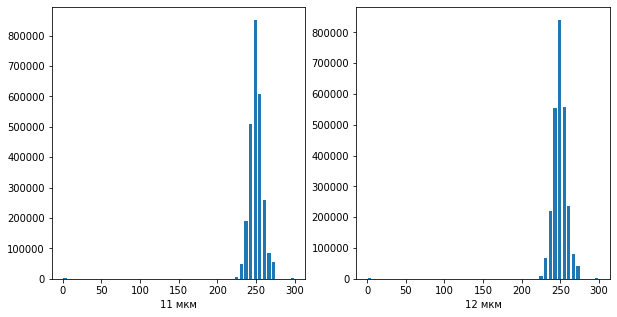

In [6]:
show_hist(T11, "11 мкм", T12, "12 мкм")

In [7]:
# Отбросим крайние значения
T11 = T11.clip(200, 300)
T12 = T12.clip(200, 300)

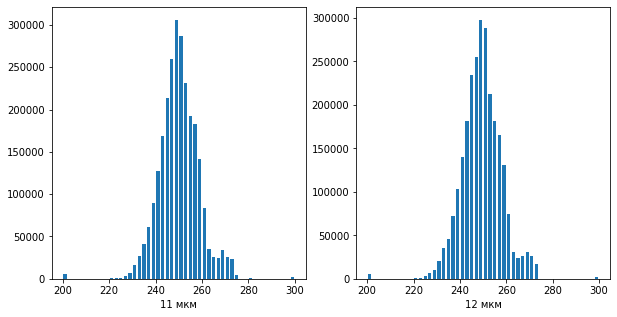

In [8]:
# Гистограмма распределения данных каналов
show_hist(T11, "11 мкм", T12, "12 мкм")

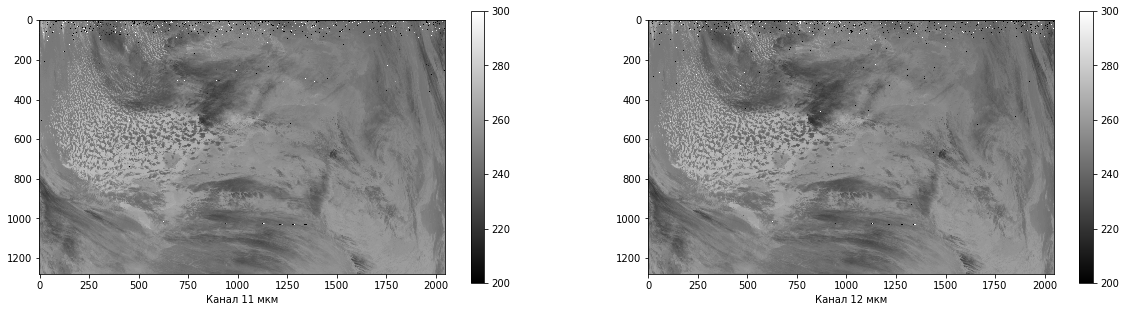

In [9]:
# В виде изображения
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.imshow(T11, cmap=plt.cm.gray)
plt.colorbar()
plt.xlabel("Канал 11 мкм")
plt.subplot(1, 2, 2)
plt.imshow(T12, cmap=plt.cm.gray)
plt.colorbar()
plt.grid(False)
plt.xlabel("Канал 12 мкм")
plt.show()

In [ ]:
#TODO наложите на массивы маску вода/суша и маску облачности

T11 = 
T12 = 

In [10]:
# Функция рассчёта SST (многоканальный алгоритм)
def calc_sst_MCSST(T11, T12):
    #TODO запишите формулу расчёта SST
    a0 = 1.00860
    b0 = 0.00136
    c0 = -0.25420
    sst = a0 * (T11 - 273.15) + b0 * (T11 - T12) + c0
    return sst


In [ ]:
# Функция рассчёта SST (многоканальный алгоритм)
def calc_sst_NLSST(T11, T12, Tguess, za):
    #TODO переведите кельвины в градусы
    
    
    #TODO запишите формулу расчёта SST
    a0 = 
    b0 = 
    c0 = 
    sst = a0 * T11 + (b0 + b1 * (sec(za) - 1) + b2*Tguess) * (T11 - T12) + c0
    return sst

In [11]:
# Расчёт SST
sst = calc_sst(T11, T12)

sst = sst.clip(-40, 40)
print("min=", np.min(sst), "max=", np.max(sst))
print(sst)

min= -40.0 max= 26.96271000000002
[[-26.63045 -25.62049 -25.62049 ...   6.71319 -40.      -29.64401]
 [-25.62049  26.89607 -25.62049 ... -34.72645 -31.67073 -29.65081]
 [-25.55521 -25.62049 -25.62049 ... -33.68657 -31.67073 -31.67073]
 ...
 [-17.55169 -15.53449 -15.53449 ... -18.55757 -18.55893 -18.55893]
 [-18.56165 -16.54309 -15.53449 ... -18.55893 -18.55893 -18.56029]
 [-18.56029 -16.54309 -15.53449 ... -18.55893 -18.55893 -18.56029]]


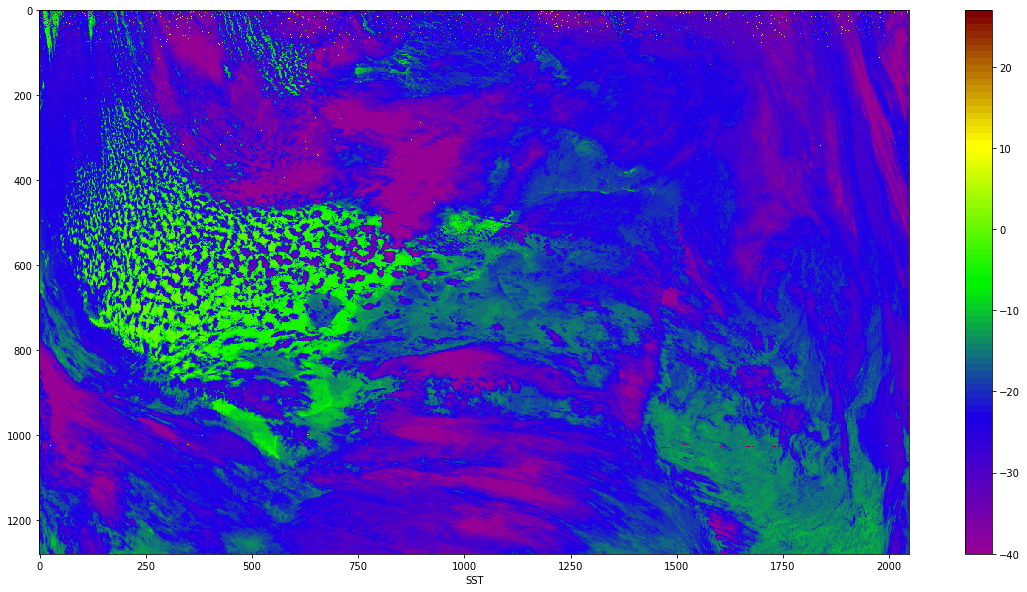

In [12]:
# Результат расчёта NDVI в виде изображения

# Создание палитры
N = 80
vals = np.ones((N, 4))

vals[0:20, 0] = np.linspace(150/256, 30/256, 20)
vals[0:20, 1] = np.linspace(0, 0, 20)
vals[0:20, 2] = np.linspace(150/256, 230/256, 20)

vals[20:40, 0] = np.linspace(30/256, 0/256, 20)
vals[20:40, 1] = np.linspace(0, 245/256, 20)
vals[20:40, 2] = np.linspace(230/256, 0/256, 20)

vals[40:60, 0] = np.linspace(0/256, 255/256, 20)
vals[40:60, 1] = np.linspace(245/256, 255/256, 20)
vals[40:60, 2] = np.linspace(0/256, 0, 20)

vals[60:80, 0] = np.linspace(255/256, 127/256, 20)
vals[60:80, 1] = np.linspace(255/256, 0/256, 20)
vals[60:80, 2] = np.linspace(0/256, 0, 20)

tempcmp = ListedColormap(vals)

# Создание изображения
plt.figure(figsize=(20, 10))
plt.imshow(sst, cmap = tempcmp)
plt.colorbar()
plt.xlabel("SST")
plt.show()